### Create a report to answer the principal's questions. Include:

* What are the average reading scores for students with/without the test preparation course?
* What are the average scores for the different parental education levels?

### Create plots to visualize findings for questions 1 and 2.
#### Optional
* Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).

#### Optional 2
* The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.
Summarize your findings.

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

### Importing Dataset

In [3]:
df =  pd.read_csv('exams.csv')

### Accessing the Data

In [4]:
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
 6   reading                 1000 non-null   int64 
 7   writing                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.parent_education_level.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [7]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

### Conclusion From Data Access
* 'High school' and 'some high school' both mean the same in the column parent education level and so should 'High school'
* "some college" should be changed to just college

# Data Cleaning

#### Define
* High school' and 'some high school' both mean the same in the column parent education level and so should 'High school'

#### Clean

In [8]:
df.loc[df.parent_education_level == 'some high school', 'parent_education_level'] = "high school"


#### Recheck

In [9]:
df.parent_education_level.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school'], dtype=object)

#### Define
* "some college" should be changed to just college

#### Clean

In [10]:
df.loc[df.parent_education_level == 'some college', 'parent_education_level'] = "college"

#### Recheck

In [11]:
df.parent_education_level.unique()

array(["bachelor's degree", 'college', "master's degree",
       "associate's degree", 'high school'], dtype=object)

## Exploratory Data Analysis

### Questions to answer
* What are the average reading scores for students with/without the test preparation course?
* What are the average scores for the different parental education levels?

### 1) What are the average reading scores for students with/without the test preparation course?

In [12]:
df.groupby('test_prep_course')[['reading']].mean()

,reading
test_prep_course,
completed,73.893855
none,66.534268


### Insight/Report
* The avrage reading score for students with test preparation course is: 73.893855
* The average reading score for students without test preparation course is: 66.534268

This suggests that the test preparation course has a positive influence on the student's reading score

### 2) What are the average scores for the different parental education levels?

In [13]:
df.groupby('parent_education_level')[['reading','math','writing']].mean()

,reading,math,writing
parent_education_level,,,
associate's degree,70.927928,67.882883,69.896396
bachelor's degree,73.000000,69.389831,73.381356
college,69.460177,67.128319,68.840708
high school,65.770667,62.786667,63.613333
master's degree,75.372881,69.745763,75.677966


# Visualisation

#### What are the average reading scores for students with/without the test preparation course?

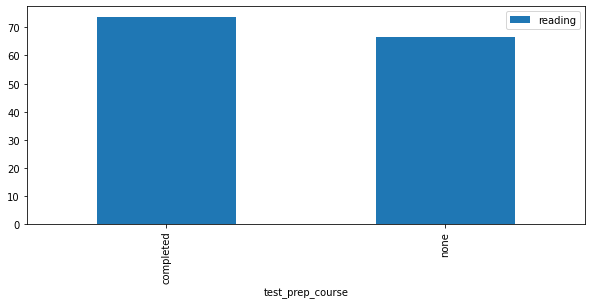

In [14]:
data_mean_2= df.groupby('test_prep_course')[['reading']].mean()
data_mean_2.plot(kind='bar', figsize = [10, 4]);

#### What are the average scores for the different parental education levels?

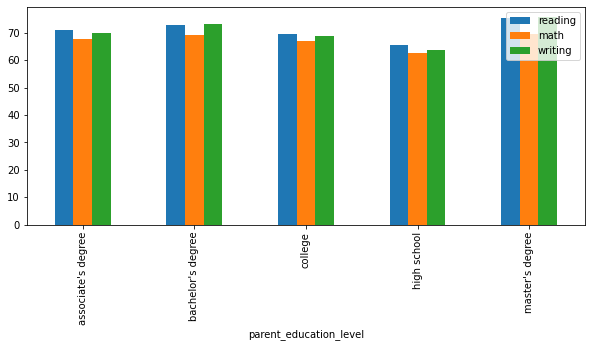

In [15]:
data_mean= df.groupby('parent_education_level')[['reading','math','writing']].mean()
data_mean.plot(kind='bar', figsize = [10, 4]);

In [33]:
df.groupby(['parent_education_level', 'test_prep_course'])[['reading','math','writing']].mean()

reading       math    writing
parent_education_level test_prep_course                                 
associate's degree     completed         76.170732  71.829268  76.817073
                       none              67.857143  65.571429  65.842857
bachelor's degree      completed         76.739130  73.282609  78.695652
                       none              70.611111  66.902778  69.986111
college                completed         75.987013  71.454545  76.519481
                       none              66.087248  64.892617  64.872483
high school            completed         69.639098  65.984962  69.390977
                       none              63.644628  61.028926  60.438017
master's degree        completed         78.250000  70.600000  80.100000
                       none              73.897436  69.307692  73.410256

### Optional 1


* Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels 

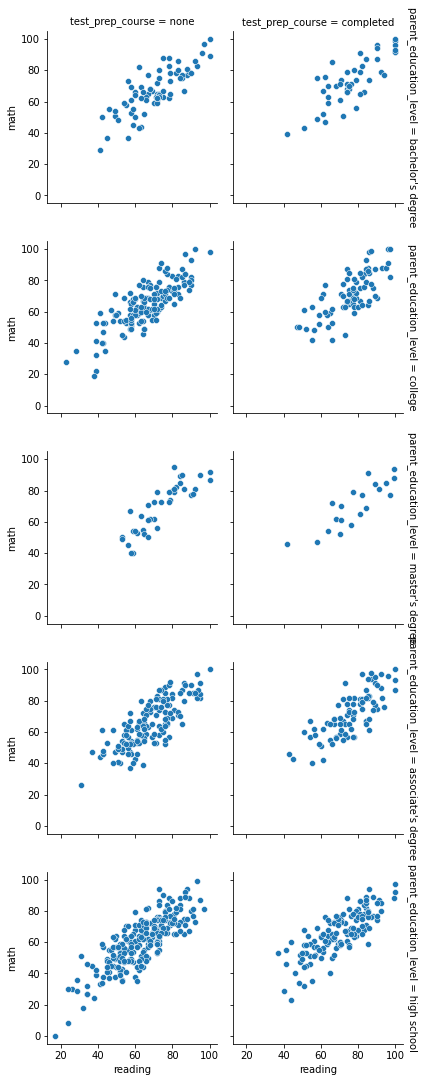

In [18]:
g = sns.FacetGrid(data = df,  col='test_prep_course', row = 'parent_education_level', margin_titles=True)
g.map(sns.scatterplot, 'reading', 'math');

### Insight/Report
from the correlation plot above we can see that students who perform well on one subject also tend to score high in other subjects

In [30]:
df[(df.math >= 90) & (df.reading >= 90) & (df.writing >= 90)]

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
2,female,group B,master's degree,standard,none,90,95,93
114,female,group E,bachelor's degree,standard,completed,99,100,100
149,male,group E,associate's degree,free/reduced,completed,100,100,93
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,high school,standard,completed,97,100,100
263,female,group E,high school,standard,none,99,93,90
451,female,group E,college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
474,female,group B,associate's degree,standard,completed,90,90,91
546,female,group A,high school,standard,completed,92,100,97
